In [5]:
import numpy as np
import matplotlib.pyplot as plt

### Data

In [24]:
pumpkin_left=plt.imread("./Data/pumpkin_left.jpg")
pumpkin_right=plt.imread("./Data/pumpkin_right.jpg")

PLeft=np.array([
    [1325.00000000, 0.00000000, 805.00000000, 0.00000000],
    [0.00000000, 1325.00000000, 468.00000000, 0.00000000],
    [0.00000000, 0.00000000, 1.00000000, 0.00000000]
])

PRight=np.array([
    [1126.67010454, -249.71530121, 1035.32929249, -1347.97882937],
    [150.95878897, 1299.48285727, 513.03484063, -381.74973338],
    [-0.18907694, -0.00556371, 0.98194651, -0.09044673]
])

verifiedLeft=np.loadtxt("./Data/PointsLeft")
verifiedRight=np.loadtxt("./Data/PointsRight")

verifiedLeft.shape

(1788, 2)

### Plotting measured points on the images

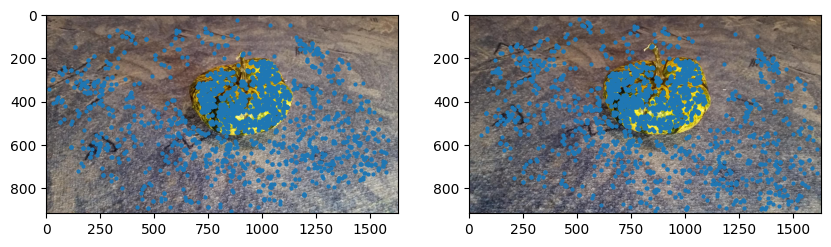

In [18]:

fig,axs=plt.subplots(1,2,figsize=(10,4))
axs[0].imshow(pumpkin_left)
axs[0].plot(verifiedLeft[:,0],verifiedLeft[:,1],'o',markersize=2)

axs[1].imshow(pumpkin_right)
axs[1].plot(verifiedRight[:,0],verifiedRight[:,1],'o',markersize=2)


### Creating the linear system to solve

In [49]:

"""
From the camera matrices creates a class that can reconstruct the 
3D points.
"""
class Reconstruct3D:
    def __init__(self,PLeft:np.array,PRight:np.array):
        self.p1L=PLeft[0]
        self.p2L=PLeft[1]
        self.p3L=PLeft[2]

        self.p1R=PRight[0]
        self.p2R=PRight[1]
        self.p3R=PRight[2]
  

    """
    Reconstructs the 3D points given the measured 2D points on the image on the left 
    and the right camera.
    """
    def get3DPoints(self,imgPointsLeft:np.array,imgPointsRight:np.array)->np.array:
        points3D=np.zeros((imgPointsLeft.shape[0],4))
        for c,(pointLeft,pointRight) in enumerate(zip(imgPointsLeft,imgPointsRight)):
            coeff_matrix=np.array([
                pointLeft[0]*self.p3L-self.p1L,
                pointLeft[1]*self.p3L-self.p2L,
                pointRight[0]*self.p3R-self.p1R,
                pointRight[1]*self.p3R-self.p2R
            ])
            ordinate_matrix=np.zeros((4,))
            homogeneous_coordinates=np.linalg.solve(coeff_matrix,ordinate_matrix)
            print(coeff_matrix)
            points3D[c]+=homogeneous_coordinates
        return points3D

In [50]:
reconstructor=Reconstruct3D(PLeft,PRight)
reconstructedHomogeneousPoints=reconstructor.get3DPoints(verifiedLeft,verifiedRight)


[[-1325.             0.            77.6            0.        ]
 [    0.         -1325.          -445.3            0.        ]
 [-1330.00344582   243.73208748    20.65598436  1250.71241593]
 [ -159.25926664 -1299.72710414  -469.92738884   377.77912193]]
[[-1325.             0.          -437.1            0.        ]
 [    0.         -1325.          -368.8            0.        ]
 [-1227.82626744   246.73871636  -509.98790964  1299.58982882]
 [ -160.35591289 -1299.75937366  -464.23209908   377.2545309 ]]
[[-1325.             0.           426.2            0.        ]
 [    0.         -1325.          -338.             0.        ]
 [-1392.92825145   241.88048479   347.44778289  1220.61174418]
 [ -188.43383848 -1300.58558459  -318.41304235   363.82319149]]
[[-1325.             0.           426.2            0.        ]
 [    0.         -1325.          -338.             0.        ]
 [-1392.92825145   241.88048479   347.44778289  1220.61174418]
 [ -188.43383848 -1300.58558459  -318.41304235   363

In [56]:
m1=np.array([
    [-1,1,-1 ],
    [ 3,-1,-1],
    [2,1,-3]
    ])
m2=np.array([1,1,1,1])
np.linalg.det(m1)

-1.9999999999999987